In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
filename = 'Yi_No_Data_April4_UnicodeProblem.csv'
df = pd.read_csv (filename)
df.shape, df.head()

((33432, 11),
   author  class_gram class_type  class code  pos_x  pos_y  size  confidence  \
 0     yi           0        num      1    0    148   1886    15       77.12   
 1     yi           0        num      1    0   1194   1890    15        0.71   
 2     yi           0        num      1    0   1176   1889    15        0.83   
 3     yi           0        num      1    0   1180   1885    14       78.98   
 4     yi           0        num      1    0    104   1882    23        1.00   
 
    difference                                             base64  
 0        0.19  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 1        0.21  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 2        0.22  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 3        0.23  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  
 4        0.24  Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...  )

In [3]:
import base64
def cv_from_b64 (s):
    str = base64.b64decode (s)
    nparr = np.frombuffer (str, np.uint8)
    img = cv.imdecode (nparr, cv.IMREAD_ANYCOLOR)
    return img
#

def imdsp (cvimg):
    img2 = cvimg[:,:,::-1]
    plt.imshow(img2)
    plt.show()
#

s = df['base64'][0]
print ('b64string = ', s[:20])
str = base64.b64decode(s)
print ('decoded = ', str[:20])
nparr = np.frombuffer (str, np.uint8)
print ('nparr = ', nparr.shape, nparr[:50])
img = cv.imdecode(nparr, cv.IMREAD_ANYCOLOR)


b64string =  Qk02CAAAAAAAADYEAAAo
decoded =  b'BM6\x08\x00\x00\x00\x00\x00\x006\x04\x00\x00(\x00\x00\x00 \x00'
nparr =  (2102,) [66 77 54  8  0  0  0  0  0  0 54  4  0  0 40  0  0  0 32  0  0  0 32  0  0
  0  1  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [4]:
print (df.iloc[3000])
img = cv_from_b64 (df['base64'][3000])
img.shape, img, img[0,0]

author                                                       yi
class_gram                                                    0
class_type                                                  kor
class                                                       205
code                                                          게
pos_x                                                       356
pos_y                                                       825
size                                                         28
confidence                                                  0.9
difference                                                  0.2
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 3000, dtype: object


((32, 32), array([[255, 255, 255, ...,  78, 252, 255],
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ...,   0,  44, 235],
        ..., 
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ...,   0,  48, 255],
        [255, 255, 255, ..., 251, 252, 255]], dtype=uint8), 255)

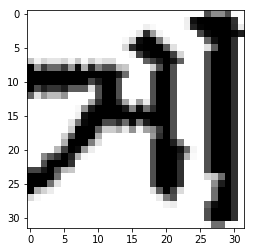

In [5]:
plt.imshow (img, cmap='gray')
plt.show ()

author                                                       no
class_gram                                                    0
class_type                                                  chi
class                                                      1848
code                                                          說
pos_x                                                       698
pos_y                                                       933
size                                                         47
confidence                                                 81.9
difference                                                 0.27
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 33000, dtype: object
(32, 32)


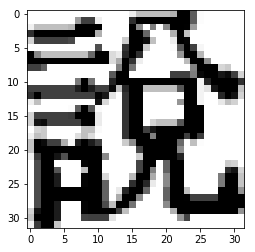

In [6]:
indx = 33000
print (df.iloc[indx])
img = cv_from_b64 (df['base64'][indx])
print (img.shape)
plt.imshow (img, cmap='gray')
plt.show()

In [7]:
img.shape, len(img.shape) == 2

((32, 32), True)

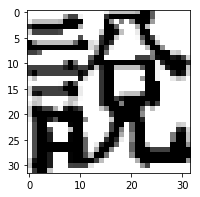

In [8]:
plt.figure(figsize=(3,3))
plt.imshow (img, cmap='gray', resample=False, interpolation=None)
plt.show()

In [9]:
from IPython.display import display, HTML

def imshow(name, imageArray):
     _, png = cv.imencode('.png', imageArray)
     encoded = base64.b64encode(png)
     return HTML(data='''<img alt="{0}" src="data:image/png;base64, {1}"/>'''.format(name, encoded.decode('ascii')))
#

In [10]:
imshow('image display', img)

In [11]:
a = df.iloc[3300]
print (a.code, a.code == '고')

고 True


In [12]:
df.head()

,author,class_gram,class_type,class,code,pos_x,pos_y,size,confidence,difference,base64
0,yi,0,num,1,0,148,1886,15,77.12,0.19,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1,yi,0,num,1,0,1194,1890,15,0.71,0.21,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
2,yi,0,num,1,0,1176,1889,15,0.83,0.22,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
3,yi,0,num,1,0,1180,1885,14,78.98,0.23,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
4,yi,0,num,1,0,104,1882,23,1.00,0.24,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...


In [13]:
rkdf = df.loc[df['code'] == '가']

In [14]:
print (rkdf.shape)
rkdf.head()

(617, 11)


,author,class_gram,class_type,class,code,pos_x,pos_y,size,confidence,difference,base64
1704,yi,1,kor,182,가,1049,593,31,86.48,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1705,yi,1,kor,182,가,615,616,30,0.87,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1706,yi,1,kor,182,가,313,721,34,78.80,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1707,yi,1,kor,182,가,823,591,35,75.60,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
1708,yi,1,kor,182,가,731,492,34,74.90,0.12,Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...


In [15]:
#[x for x in rkdf['base64']]
cv_from_b64 (rkdf['base64'].iloc[0])
imgs = []
for x in rkdf['base64']:
#    print (x)
    imgs.append (cv_from_b64(x))
#

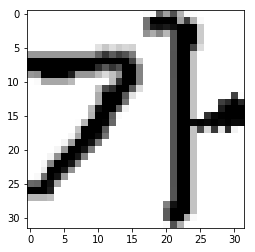

In [19]:
#rkdf['base64'].iloc[0]
plt.imshow (imgs[20], cmap='gray')

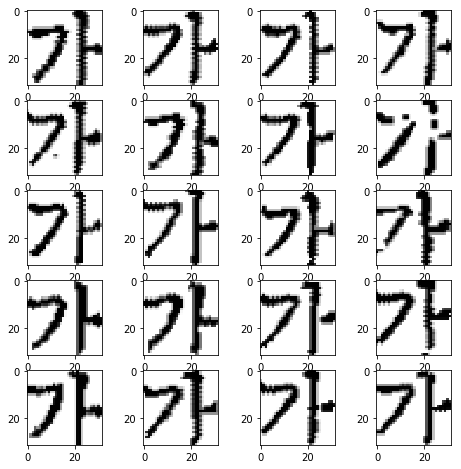

In [20]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = imgs[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [34]:
# create a new column named 'images'
rkdf = rkdf.assign (images = imgs) 

In [35]:
rkdf.columns

Index(['author', 'class_gram', 'class_type', 'class', 'code', 'pos_x', 'pos_y',
       'size', 'confidence', 'difference', 'base64', 'images'],
      dtype='object')

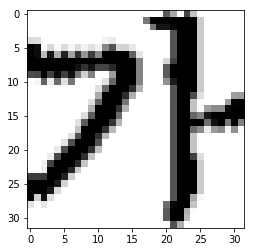

In [37]:
plt.imshow (rkdf['images'].iloc[110], cmap='gray')

In [38]:
rkdf.shape

(617, 12)

In [103]:
dstack = []
for i in range (rkdf['images'].shape[0]):
    dstack.append (rkdf['images'].iloc[i].reshape(-1))
rkdata = np.vstack (dstack)
rkdata.shape

(617, 1024)

In [94]:
a = rkdf['images'].iloc[0].reshape(-1)
a.shape
s = np.vstack ((a,a))
print (s, s.shape)

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]] (2, 1024)


In [46]:
from r_pca import R_pca

ModuleNotFoundError: No module named 'r_pca'

In [52]:
#import r_pca
#```
#    src: https://github.com/dganguli/robust-pca
#```

from __future__ import division, print_function

import numpy as np

try:
    from pylab import plt
except ImportError:
    print('Unable to import pylab. R_pca.plot_fit() will not work.')

try:
    # Python 2: 'xrange' is the iterative version
    range = xrange
except NameError:
    # Python 3: 'range' is iterative - no need for 'xrange'
    pass


class R_pca:

    def __init__(self, D, mu=None, lmbda=None):
        self.D = D
        self.S = np.zeros(self.D.shape)
        self.Y = np.zeros(self.D.shape)

        if mu:
            self.mu = mu
        else:
            self.mu = np.prod(self.D.shape) / (4 * self.norm_p(self.D, 2))

        self.mu_inv = 1 / self.mu

        if lmbda:
            self.lmbda = lmbda
        else:
            self.lmbda = 1 / np.sqrt(np.max(self.D.shape))

    @staticmethod
    def norm_p(M, p):
        return np.sum(np.power(M, p))

    @staticmethod
    def shrink(M, tau):
        return np.sign(M) * np.maximum((np.abs(M) - tau), np.zeros(M.shape))

    def svd_threshold(self, M, tau):
        U, S, V = np.linalg.svd(M, full_matrices=False)
        return np.dot(U, np.dot(np.diag(self.shrink(S, tau)), V))

    def fit(self, tol=None, max_iter=1000, iter_print=100):
        iter = 0
        err = np.Inf
        Sk = self.S
        Yk = self.Y
        Lk = np.zeros(self.D.shape)

        if tol:
            _tol = tol
        else:
            _tol = 1E-7 * self.norm_p(np.abs(self.D), 2)

        while (err > _tol) and iter < max_iter:
            Lk = self.svd_threshold(
                self.D - Sk + self.mu_inv * Yk, self.mu_inv)
            Sk = self.shrink(
                self.D - Lk + (self.mu_inv * Yk), self.mu_inv * self.lmbda)
            Yk = Yk + self.mu * (self.D - Lk - Sk)
            err = self.norm_p(np.abs(self.D - Lk - Sk), 2)
            iter += 1
            if (iter % iter_print) == 0 or iter == 1 or iter > max_iter or err <= _tol:
                print('iteration: {0}, error: {1}'.format(iter, err))

        self.L = Lk
        self.S = Sk
        return Lk, Sk

    def plot_fit(self, size=None, tol=0.1, axis_on=True):

        n, d = self.D.shape

        if size:
            nrows, ncols = size
        else:
            sq = np.ceil(np.sqrt(n))
            nrows = int(sq)
            ncols = int(sq)

        ymin = np.nanmin(self.D)
        ymax = np.nanmax(self.D)
        print('ymin: {0}, ymax: {1}'.format(ymin, ymax))

        numplots = np.min([n, nrows * ncols])
        plt.figure()

        for n in range(numplots):
            plt.subplot(nrows, ncols, n + 1)
            plt.ylim((ymin - tol, ymax + tol))
            plt.plot(self.L[n, :] + self.S[n, :], 'r')
            plt.plot(self.L[n, :], 'b')
            if not axis_on:
                plt.axis('off')

iteration: 1, error: 3096749.5633048196
iteration: 26, error: 0.3995615058551789
ymin: 0.0, ymax: 30.0


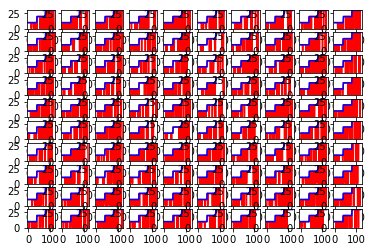

In [63]:
# generate low rank synthetic data
N = 100
num_groups = 3
num_values_per_group = 40
p_missing = 0.2

Ds = []
for k in range(num_groups):
    d = np.ones((N, num_values_per_group)) * (k + 1) * 10
    Ds.append(d)

D = np.hstack(Ds)
D0 = D.copy() # original

# decimate 20% of data 
n1, n2 = D.shape
S = np.random.rand(n1, n2)
D[S < 0.2] = 0

# use R_pca to estimate the degraded data as L + S, where L is low rank, and S is sparse
rpca = R_pca(D)
L, S = rpca.fit(max_iter=10000, iter_print=100)

# visually inspect results (requires matplotlib)
rpca.plot_fit()
plt.show()

In [64]:
D[0], D[0].shape, D.shape

(array([ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
         10.,  10.,  10.,   0.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
         10.,  10.,   0.,  10.,   0.,  10.,  10.,  10.,  10.,  10.,   0.,
         10.,  10.,  10.,   0.,  10.,  10.,  10.,   0.,   0.,  20.,  20.,
         20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,   0.,
         20.,  20.,  20.,   0.,   0.,  20.,  20.,  20.,  20.,  20.,  20.,
         20.,   0.,  20.,  20.,  20.,  20.,   0.,  20.,  20.,  20.,  20.,
         20.,   0.,  20.,  30.,   0.,  30.,  30.,  30.,  30.,  30.,   0.,
         30.,  30.,  30.,  30.,   0.,  30.,  30.,  30.,  30.,  30.,   0.,
          0.,  30.,   0.,  30.,  30.,  30.,  30.,  30.,   0.,   0.,   0.,
         30.,  30.,  30.,   0.,  30.,  30.,  30.,  30.,  30.,   0.]),
 (120,),
 (100, 120))

In [65]:
L.shape, S.shape

((100, 120), (100, 120))

In [66]:
L

array([[  9.99725453,   9.98700265,   9.9940947 , ...,  29.99938942,
         30.00336529,  29.99935373],
       [  9.99742338,   9.98717133,   9.99426351, ...,  29.99989612,
         30.00387205,  29.99986042],
       [  9.99427244,   9.98402363,   9.99111356, ...,  29.9904409 ,
         29.99441558,  29.99040522],
       ..., 
       [  9.9959661 ,   9.98571554,   9.99280668, ...,  29.99552315,
         29.9994985 ,  29.99548746],
       [  9.99489751,   9.98464805,   9.99173843, ...,  29.99231658,
         29.99629151,  29.9922809 ],
       [  9.99531277,   9.98506288,   9.99215356, ...,  29.99356266,
         29.99753775,  29.99352698]])

In [67]:
S

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , -29.99935373],
       [  0.        ,  -9.98717133,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  -9.99111356, ..., -29.9904409 ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,  -9.99280668, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [75]:
np.min( np.abs(D0 - L) / D0 )

3.4284083128000021e-09

In [81]:
u,d,v = np.linalg.svd (L)
print ('@ singular values of L', d, d.shape)

@ singular values of L [  2.36622326e+03   9.63505100e-13   9.19928167e-13   9.16173913e-13
   8.26082163e-13   8.23780920e-13   7.95975093e-13   6.57453633e-13
   6.14456774e-13   6.08108372e-13   4.44067068e-13   3.94060884e-13
   3.29637602e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.36433199e-13   2.36433199e-13   2.36433199e-13   2.36433199e-13
   2.364331

In [82]:
u,d,v = np.linalg.svd (D)
print ('@ Singular Values of corrupted matrix D\n', d, d.shape)

@ Singular Values of corrupted matrix D
 [ 1891.19387602   203.05760184   201.35333696   192.59918485   187.20226789
   178.6130567    172.54035268   170.18281373   167.95272228   162.47106532
   159.18599351   154.83271248   152.05306475   145.87077078   145.44904211
   143.88076367   141.77414134   139.16637141   135.64710694   131.20236633
   129.52005427   125.66267297   123.33816449   122.49278844   118.54099898
   117.21340608   115.77452586   112.92597011   111.66362622   110.60827762
   107.63406266   105.59295631   103.34558381    99.86516219    98.08222787
    96.45232707    93.40866302    92.36319732    88.46805041    87.25801087
    86.99051909    83.07877941    81.89204145    80.32997146    79.73755129
    77.94452491    74.87967371    74.50562357    72.43140907    69.96348599
    68.27774528    67.13852637    65.87554316    63.86240003    62.81798526
    59.74983666    57.8144597     56.33725932    55.99075499    54.50596189
    53.54223512    50.73500372    48.8387987   

In [86]:
np.sum (S != 0.) / S.shape[0]/S.shape[1]

0.20075000000000001

In [104]:
# use R_pca to estimate the degraded data as L + S, where L is low rank, and S is sparse
rpca = R_pca(rkdata)
L, S = rpca.fit(max_iter=10000, iter_print=100)

iteration: 1, error: 945719.9190519253
iteration: 100, error: 265.5579626127955
iteration: 200, error: 21.502068280520163
iteration: 300, error: 3.722682451522931
iteration: 395, error: 1.0641938363729537


(617,) [  1.65327348e+05   2.66051957e+04   1.12449832e+04   1.05003031e+04
   7.12892969e+03   6.63724243e+03   6.17780854e+03   4.74305566e+03
   4.51104552e+03   3.96693367e+03   3.75901697e+03   2.95270524e+03
   2.77861948e+03   2.66078527e+03   2.33935615e+03   2.22729226e+03
   1.86970455e+03   1.81609563e+03   1.70563454e+03   1.57071680e+03
   1.39528241e+03   1.35346969e+03   1.18489372e+03   1.14768768e+03
   1.10837470e+03   1.06747294e+03   1.03154464e+03   9.58937612e+02
   8.59385542e+02   8.09540413e+02   7.94493195e+02   7.47599653e+02
   6.84344624e+02   6.70405315e+02   6.33052585e+02   5.83809164e+02
   5.56988249e+02   5.27947764e+02   5.11079306e+02   4.47530532e+02
   4.35771406e+02   4.17448522e+02   4.11742449e+02   3.83532685e+02
   3.63158503e+02   3.32716612e+02   3.21005554e+02   3.11564608e+02
   2.92487698e+02   2.86975172e+02   2.74921694e+02   2.53158595e+02
   2.43176883e+02   2.36979962e+02   2.27736893e+02   2.19575257e+02
   2.00896682e+02   1.92402

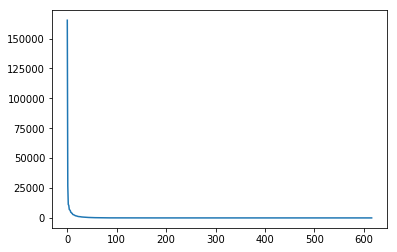

In [114]:
uL,dL,vL = np.linalg.svd (L)
print (dL.shape, dL[:100])
plt.plot (range(dL.shape[0]), dL)

In [116]:
np.max ( np.abs(S) )

261.46889932738719

(617,) [ 163616.19076903   26537.63023523   13106.17803708   12137.83113023
    8736.78200428    8171.15264555    7523.10716663    6558.59823693
    6269.18682507    5902.67088765]


([<matplotlib.lines.Line2D at 0x1c8dea7c7f0>],
 [<matplotlib.lines.Line2D at 0x1c8dea7c9b0>])

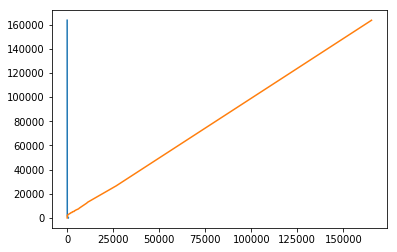

In [120]:
u,d,v = np.linalg.svd (rkdata)
print (d.shape, d[:10])
plt.plot (range(d.shape[0]), d), plt.plot (dL, d)

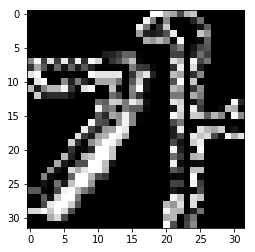

In [127]:
d = np.abs( rkdata[0] - rkdata[1] ).reshape(32,32)
plt.imshow (d, cmap='gray')

In [318]:
m = cv.merge ((255-rkdf['images'].iloc[0], 255-rkdf['images'].iloc[1], 255-rkdf['images'].iloc[2]))

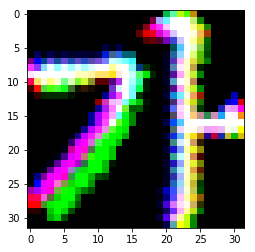

In [319]:
plt.imshow (m)

(1024,) [ 0.          0.          1.61033936 ...,  0.          0.          0.        ]


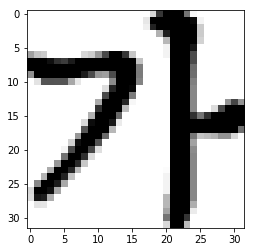

In [347]:
mean_img = np.median (rkdata, axis=0) # np.mean (rkdata, axis=0)
plt.imshow (mean_img.reshape(32,32), cmap='gray')

std_img =  np.sqrt (  np.sum ((rkdata - mean_img) * (rkdata - mean_img), axis=0) / rkdata.shape[0] )
print (std_img.shape, std_img)
#std_img =  np.std (rkdata, axis=0)

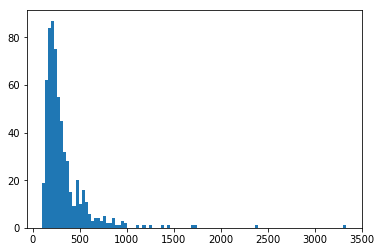

In [348]:
def dist (x, m, s):
    d = 0
    for i in range(s.shape[0]):
        if s[i] != 0.0:
            d += np.abs(x[i] - m[i])/s[i]
    return d

dists = [dist(x, mean_img, std_img) for x in rkdata]

#plt.plot (dists)
h=plt.hist (dists, bins=100)

@ argmax(dists) =  459
@ stats(dists) =  322.118718353 250.46714158 3338.74411256 12.0439965705


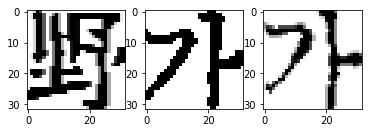

In [349]:
imax = np.argmax (dists)
print ('@ argmax(dists) = ', imax)
print ('@ stats(dists) = ', np.mean(dists), np.std(dists), dists[imax], (dists[imax]-np.mean(dists))/np.std(dists))

plt.subplot (131)
plt.imshow (rkdata[imax].reshape(32,32), cmap='gray')
plt.subplot (132)
plt.imshow (rkdata[imax-1].reshape(32,32), cmap='gray')
plt.subplot (133)
plt.imshow (rkdata[imax+1].reshape(32,32), cmap='gray')

[459  93 614  26  24 540 544 212 465 201]
index = 459  m_dist = 3338.7   dist normalized =  12.0
index =  93  m_dist = 2394.7   dist normalized =   8.3
index = 614  m_dist = 1740.3   dist normalized =   5.7
index =  26  m_dist = 1707.5   dist normalized =   5.5
index =  24  m_dist = 1452.9   dist normalized =   4.5
index = 540  m_dist = 1378.8   dist normalized =   4.2
index = 544  m_dist = 1250.3   dist normalized =   3.7
index = 212  m_dist = 1194.1   dist normalized =   3.5
index = 465  m_dist = 1108.4   dist normalized =   3.1
index = 201  m_dist = 993.1   dist normalized =   2.7


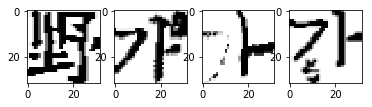

In [350]:
asort = np.argsort (dists)[::-1]
print (asort[:10])
for i in asort[:10]:
    print ('index = %3d  m_dist = %.1f   dist normalized = %5.1f' %
           (i, dist(rkdata[i], mean_img, std_img), (dists[i]-np.mean(dists))/np.std(dists)))

plt.subplot (141)
plt.imshow (rkdata[asort[0]].reshape(32,32), cmap='gray')
plt.subplot (142)
plt.imshow (rkdata[asort[1]].reshape(32,32), cmap='gray')
plt.subplot (143)
plt.imshow (rkdata[asort[2]].reshape(32,32), cmap='gray')
plt.subplot (144)
plt.imshow (rkdata[asort[3]].reshape(32,32), cmap='gray')

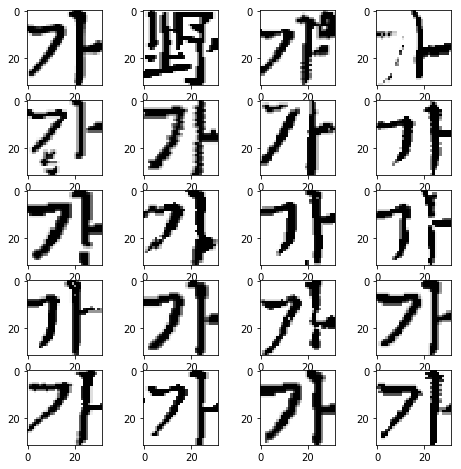

In [351]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
fig.add_subplot(rows,columns,1)
plt.imshow (mean_img.reshape(32,32), cmap='gray')
for i in range(columns*rows-1):
    img = rkdata[asort[i]].reshape(32,32)
    fig.add_subplot(rows, columns, i+2)
    plt.imshow(img, cmap='gray')
plt.show()

var= [ 0.          0.          2.58898996 ...,  0.          0.          0.        ]
114.534570584 [ 0.          0.          1.60903386 ...,  0.          0.          0.        ]


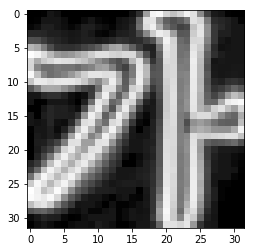

In [316]:
var_img = np.var (rkdata, axis=0)
print ('var=', var_img)
std_img = np.std (rkdata, axis=0)
print (np.max(std_img), std_img)
plt.imshow (std_img.reshape(32,32).astype(np.uint8), cmap='gray')

In [269]:
def cov (data): # sample covariance
    m = np.mean (data).astype(np.float64)
    c = np.zeros ( (data.shape[1], data.shape[1]), dtype=np.float64)
    for i in range (data.shape[0]):
        d = data[i] - m
        c += np.outer (d, d)
    #
    c /= data.shape[0]
    return c
#
cov = cov (rkdata)
cov.shape

(1024, 1024)

In [ ]:
#np.linalg.eig (cov)
#print (covInv - covInv.transpose())
cov_rank = np.linalg.matrix_rank (cov)
print ('@ cov rank = ', cov_rank)
u,d,v = np.linalg.svd (cov)
print ('d = ', d)
d2 = d.copy()
for i in range(d2.shape[0]):
    if i < cov_rank:
        d2[i] = 1/d2[i]
    else:
        d2[i] = 0.
#d2[cov_rank:] = 0
print ('d2 = ', d2)
icov = np.matmul( np.matmul(v, np.diag(d2)), u.transpose() )
np.matmul(cov, icov)

In [ ]:
print ('cov rank =  %d out of %d' % (np.linalg.matrix_rank (cov), cov.shape[0]))
d = rkdata[100] - mean_img
print ('max abs d = ', np.max(np.abs(d)))
# plt.imshow (np.abs(d.reshape(32,32)), cmap='gray')

a = icov.dot (d)
print ('mdist = ', np.sqrt(a.dot(d)))

def mah_dist (x, use_var=False):
    d = x - mean_img
    if use_var:
        ad = d
        for i in range (var_img.shape[0]):
            if np.abs(var_img[i]) > 1e-7:
                ad[i] /= var_img[i]
    else:
        ad = icov.dot (d)
    val = ad.dot(d)
    if val < 0:
        print ('!! negative val: ', val)
    return np.sqrt (ad.dot(d) / d.shape[0]) 

mdist = [ mah_dist(rkdata[i], use_var=False) for i in range(rkdata.shape[0])]

print (max(mdist), min(mdist), ' ', np.mean(mdist), np.std(mdist))
plt.plot (mdist)

author                                                       yi
class_gram                                                    0
class_type                                                  kor
class                                                       205
code                                                          게
pos_x                                                       356
pos_y                                                       825
size                                                         28
confidence                                                  0.9
difference                                                  0.2
base64        Qk02CAAAAAAAADYEAAAoAAAAIAAAACAAAAABAAgAAAAAAA...
Name: 3000, dtype: object
covInv max =  0.0
-281058764.049 [ 0.          0.          0.06482982 ..., -4.         -3.          0.        ]


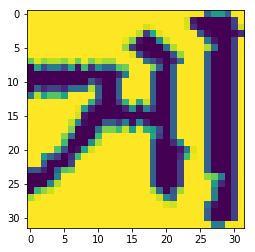

In [241]:
indx = 3000
print (df.iloc[indx,:])
img0 = cv_from_b64 (df['base64'].iloc[indx])

print ('covInv max = ', np.max (cov - cov.transpose()))

dif = img0.reshape(-1) - mean_img
d = dif.dot(covInv.dot(dif))
print (d, dif)
#print ('@ dist = ', mah_dist (img0.reshape(-1), use_var=False))
plt.imshow (img0)

In [143]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(rkdata)
X = pca.transform(rkdata)

In [148]:
X

array([[  673.46550341,  -399.90766793,   279.33181008],
       [ 1623.64011782,   361.16715001,   945.89075018],
       [ -314.55717933,  -265.62393488,   -83.86069946],
       ..., 
       [  243.57812891,  1194.86529604,  1659.52310272],
       [ -782.99467768,   277.80345336,   -69.18658248],
       [ 1145.59288849,   204.10158325,  -142.0410178 ]])

In [152]:
X[:,1].shape

(617,)

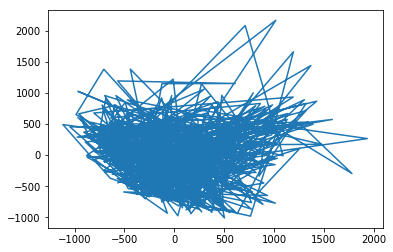

In [153]:
plt.plot (X[:,1], X[:,2])

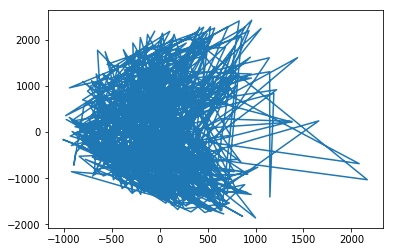

In [155]:
plt.plot (X[:,2], X[:,0])